In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Data

In [4]:
train_data_dir = "chest_xray/train"
test_data_dir = "chest_xray/test"
val_data_dir = "chest_xray/val"

idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_data_dir, color_mode = 'grayscale',
                                          target_size =(128, 128),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_generator = idg.flow_from_directory(test_data_dir, color_mode = 'grayscale',
                                        target_size =(128,128),
                                        batch_size = 32,
                                        class_mode = 'binary')
valid_generator = idg.flow_from_directory(val_data_dir, color_mode = 'grayscale',
                                         target_size = (128, 128),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Model

In [13]:
model = Sequential()

model.add(Conv2D(32,1, activation = 'relu', input_shape = (128, 128, 1)))

model.add(MaxPool2D(pool_size = 2))

model.add(Conv2D(32, 1, activation = 'relu'))

model.add(MaxPool2D(pool_size = 3))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

In [14]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        1056      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1411300   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [15]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=3)

In [17]:
hist=model.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 49s 298ms/step - loss: 0.4886 - accuracy: 0.7676 - val_loss: 0.4689 - val_accuracy: 0.6875
Epoch 2/3
163/163 [==============================] - 47s 289ms/step - loss: 0.1319 - accuracy: 0.9547 - val_loss: 0.8037 - val_accuracy: 0.5625
Epoch 3/3
163/163 [==============================] - 47s 288ms/step - loss: 0.1028 - accuracy: 0.9618 - val_loss: 0.2598 - val_accuracy: 0.9375


### Evaluation

In [26]:
hist_dict = hist.history
print(hist_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

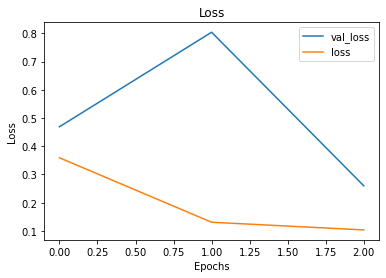

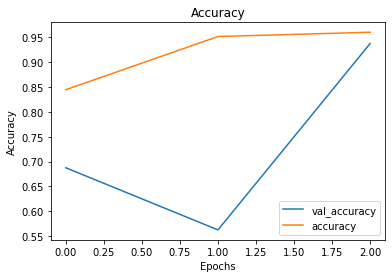

In [28]:
visualize_training_results(hist)

In [19]:
model.evaluate(test_generator)

20/20 [==============================] - 4s 214ms/step - loss: 0.5760 - accuracy: 0.8029


[0.5760464072227478, 0.8028846383094788]

### Model Tuning